In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [2]:
train_df = pd.read_csv('C:\\Data Science with SAS\\Datasets\\train.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df = pd.read_csv('C:\\Data Science with SAS\\Datasets\\test.csv')

In [5]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
#EDA
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

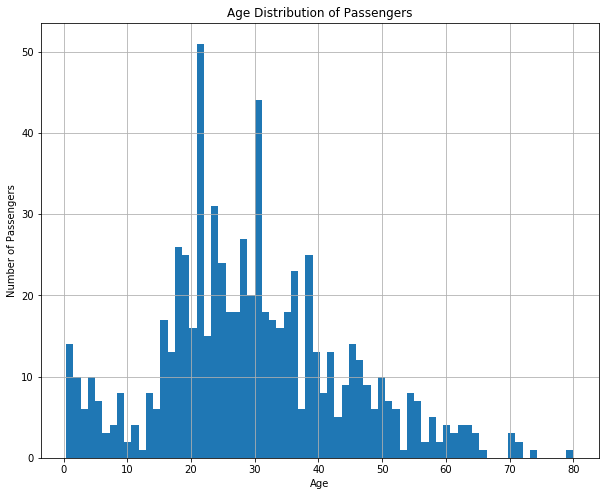

In [7]:
# Explore data for passengers age distribution
plt.figure(figsize=(10,8))
train_df['Age'].hist(bins=70)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()

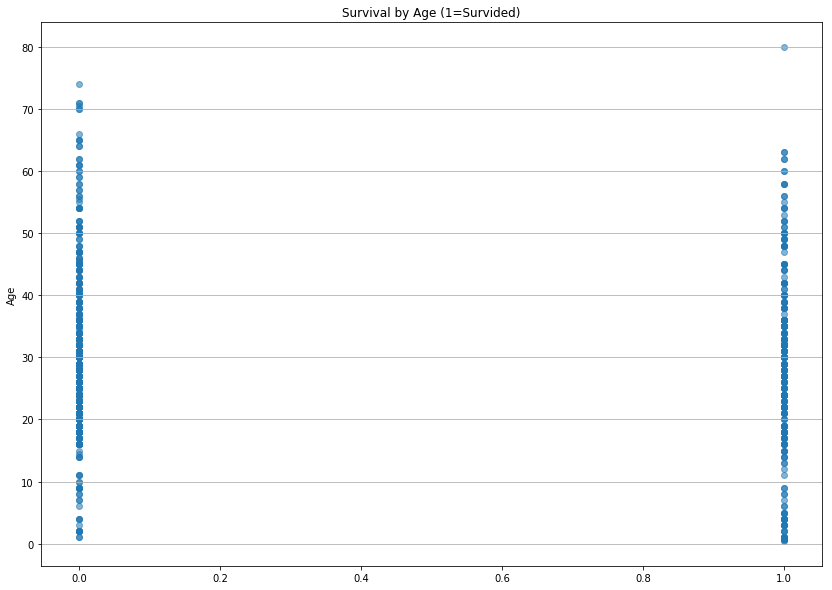

In [8]:
#Explore data for passengers survival by age
plt.figure(figsize=(14,10))
plt.scatter(train_df.Survived,train_df.Age,alpha=0.55)

plt.ylabel('Age')

plt.grid(b=True, which='major', axis='y')
plt.title('Survival by Age (1=Survided)')
plt.show()

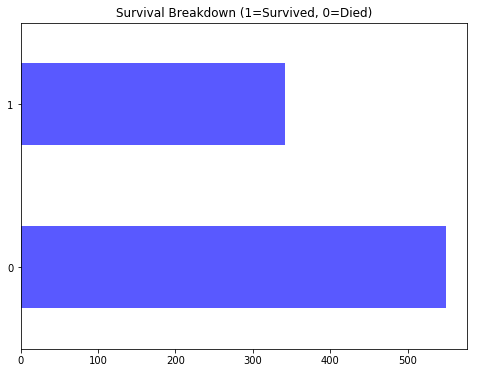

In [9]:
#Explore data for surivival breakdown
plt.figure(figsize=(8,6))
train_df.Survived.value_counts().plot(kind='barh', color='blue', alpha=.65)
plt.title('Survival Breakdown (1=Survived, 0=Died)')
plt.show()

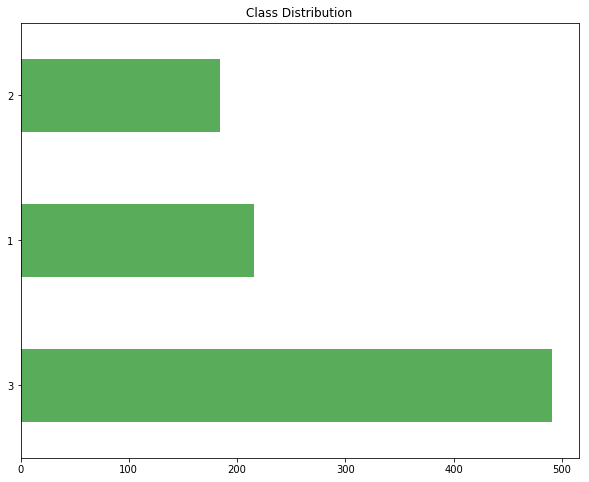

In [11]:
#Explore data for passengers Class distribution
plt.figure(figsize=(10,8))
train_df.Pclass.value_counts().plot(kind='barh', color='green', alpha=.65)
plt.title('Class Distribution')
plt.show()

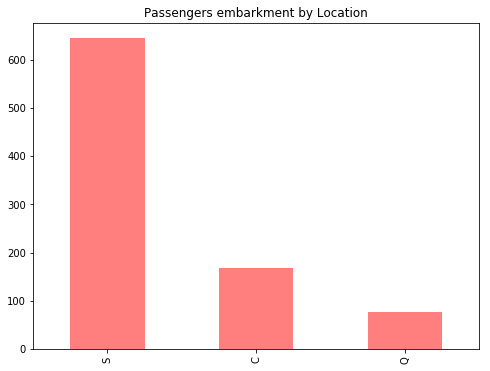

In [14]:
#Explore data for passengers embarkment by location
plt.figure(figsize=(8,6))
train_df.Embarked.value_counts().plot(kind='bar', color='red', alpha=.5)
plt.title('Passengers embarkment by Location')
plt.show()

In [15]:
#function to load train data file
def load_titanic_train_file():
    titanic_train_df = pd.read_csv('C:\\Data Science with SAS\\Datasets\\train.csv')
    cols = ["Pclass", "Sex", "Age"]
    titanic_train_df["Sex"] = titanic_train_df["Sex"].apply(lambda sex:1 if sex=="male" else 0)
    titanic_train_df["Age"] = titanic_train_df["Age"].fillna(titanic_train_df["Age"].mean())
    titanic_train_df["Fare"] = titanic_train_df["Fare"].fillna(titanic_train_df["Fare"].mean())
    survived = titanic_train_df["Survived"].values
    data = titanic_train_df[cols].values
    return survived, data

In [21]:
#funtion to load test data file
def load_titanic_test_file():
    titanic_test_df = pd.read_csv('C:\\Data Science with SAS\\Datasets\\test.csv')
    cols = ["Pclass", "Sex", "Age"]
    titanic_test_df["Sex"] = titanic_test_df["Sex"].apply(lambda sex:1 if sex=="male" else 0)
    titanic_test_df["Age"] = titanic_test_df["Age"].fillna(titanic_test_df["Age"].mean())
    titanic_test_df["Fare"] = titanic_test_df["Fare"].fillna(titanic_test_df["Fare"].mean())
    data = titanic_test_df[cols].values
    return data

In [22]:
#dataset for machine learning
survived, data_train = load_titanic_train_file()
data_test = load_titanic_test_file()

In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [26]:
#Fit the data into model
model.fit(data_train, survived)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
#Predict the test data with the model
predictValues = model.predict(data_test)

In [28]:
#View the Predicted values
predictValues

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [29]:
#View test data
data_test

array([[  3.        ,   1.        ,  34.5       ],
       [  3.        ,   0.        ,  47.        ],
       [  2.        ,   1.        ,  62.        ],
       ..., 
       [  3.        ,   1.        ,  38.5       ],
       [  3.        ,   1.        ,  30.27259036],
       [  3.        ,   1.        ,  30.27259036]])

In [32]:
#Test dataset for predicting and testing
new_test_prediction_set = [[1,1,22],[3,0,26],[1,0,38]]

In [33]:
#Test model to predict the outcom from the test dataset
model.predict(new_test_prediction_set)

array([0, 1, 1], dtype=int64)

In [34]:
#Import library for model persistence
import pickle as pkl

In [35]:
#Use dumps method to persist the model
persist_model = pkl.dumps(model)

In [37]:
#View the persisted model
persist_model

"ccopy_reg\n_reconstructor\np0\n(csklearn.linear_model.logistic\nLogisticRegression\np1\nc__builtin__\nobject\np2\nNtp3\nRp4\n(dp5\nS'warm_start'\np6\nI00\nsS'C'\np7\nF1.0\nsS'n_jobs'\np8\nI1\nsS'verbose'\np9\nI0\nsS'fit_intercept'\np10\nI01\nsS'solver'\np11\nS'liblinear'\np12\nsS'classes_'\np13\ncnumpy.core.multiarray\n_reconstruct\np14\n(cnumpy\nndarray\np15\n(I0\ntp16\nS'b'\np17\ntp18\nRp19\n(I1\n(L2L\ntp20\ncnumpy\ndtype\np21\n(S'i8'\np22\nI0\nI1\ntp23\nRp24\n(I3\nS'<'\np25\nNNNI-1\nI-1\nI0\ntp26\nbI00\nS'\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x01\\x00\\x00\\x00\\x00\\x00\\x00\\x00'\np27\ntp28\nbsS'n_iter_'\np29\ng14\n(g15\n(I0\ntp30\ng17\ntp31\nRp32\n(I1\n(L1L\ntp33\ng21\n(S'i4'\np34\nI0\nI1\ntp35\nRp36\n(I3\nS'<'\np37\nNNNI-1\nI-1\nI0\ntp38\nbI00\nS'\\x0c\\x00\\x00\\x00'\np39\ntp40\nbsS'intercept_scaling'\np41\nI1\nsS'penalty'\np42\nS'l2'\np43\nsS'multi_class'\np44\nS'ovr'\np45\nsS'random_state'\np46\nNsS'_sklearn_version'\np47\nS'0.19.1'\np48\nsS'dual'\np49\nI00\nsS'tol'\np50

In [40]:
#Use joblib to persist the model to a file
from sklearn.externals import joblib
joblib.dump(model,'logRegModelFile.pkl') 

['logRegModelFile.pkl']

In [41]:
#Create new model from the saved model
new_model = joblib.load('logRegModelFile.pkl')

In [42]:
#view new model
new_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
#Use new model to predict the test dataset outcome
new_model.predict(new_test_prediction_set)

array([0, 1, 1], dtype=int64)